In [6]:
!pip install missingno

# https://jupyterlab.readthedocs.io/en/3.6.x/user/toc.html

In [7]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import missingno as msno
import plotly.express as px
import seaborn as sns



In [8]:
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__) # Access version through the module
print("missingno version:", msno.__version__)
print("seaborn version:", sns.__version__)


pandas version: 2.2.2
matplotlib version: 3.10.0
missingno version: 0.5.2
seaborn version: 0.13.2


In [9]:
def mount_drive():
    """Mount Google Drive to access files."""
    drive.mount('/content/drive')

def get_csv_file_paths(directory, extension='.csv'):
    """Retrieve all CSV file paths from the specified directory."""
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                file_paths.append(os.path.join(root, file))
    return file_paths

def load_dataset(file_path, encoding=None):
    """Load a dataset from a given file path."""
    try:
        return pd.read_csv(file_path, encoding=encoding)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def display_dataset_info(df, name):
    """Display basic information about a dataset."""
    print(f"\n{name} Info:")
    print(df.info())
    print(f"\n{name} Description:")
    print(df.describe())
    print(f"\n{name} Data Types:")
    print(df.dtypes)
    print(f"\n{name} Missing Values:")
    print(df.isnull().sum())
    print(f"\n{name} Shape:")
    print(df.shape)

def drop_unnecessary_columns(df, columns_to_drop):
    """Drop specified columns from a dataset."""
    return df.drop(columns=columns_to_drop, errors='ignore')

def visualize_missing_values(df, title):
    """Visualize missing values in a dataset."""
    print(f"Visualizing missing values for: {title}")
    msno.bar(df)
    plt.title(f"Missing Values: {title}")
    plt.show()

In [10]:
# Step 1: Mount Google Drive
mount_drive()

# Step 2: Define Dataset Paths
base_path = "/content/drive/MyDrive/OCR/P2/data"
data_files = {
    "EdStatsData": "EdStatsData.csv",
    "EdStatsCountry": "EdStatsCountry.csv",
    "EdStatsCountrySeries": "EdStatsCountry-Series.csv",
    "EdStatsFootNote": "EdStatsFootNote.csv",
    "EdStatsSeries": "EdStatsSeries.csv"
}



Mounted at /content/drive


In [11]:
# Step 3: Load Datasets
datasets = {}
for name, filename in data_files.items():
    datasets[name] = load_dataset(os.path.join(base_path, filename), encoding="UTF-8" if name == "EdStatsData" else None)



In [12]:
# Step 4: Display Dataset Info
for name, df in datasets.items():
    if df is not None:
        display_dataset_info(df, name)




EdStatsData Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   floa

In [13]:
# Step 5: Drop Unnecessary Columns
columns_to_drop = {
    "EdStatsData": ['Unnamed: 69'],
    "EdStatsCountry": ['Unnamed: 31'],
    "EdStatsCountrySeries": ['Unnamed: 3'],
    "EdStatsFootNote": ['Unnamed: 4'],
    "EdStatsSeries": ['Unit of measure', 'Notes from original source', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']
}

for name, cols in columns_to_drop.items():
    if datasets.get(name) is not None:
        datasets[name] = drop_unnecessary_columns(datasets[name], cols)



Visualizing missing values for: EdStatsData


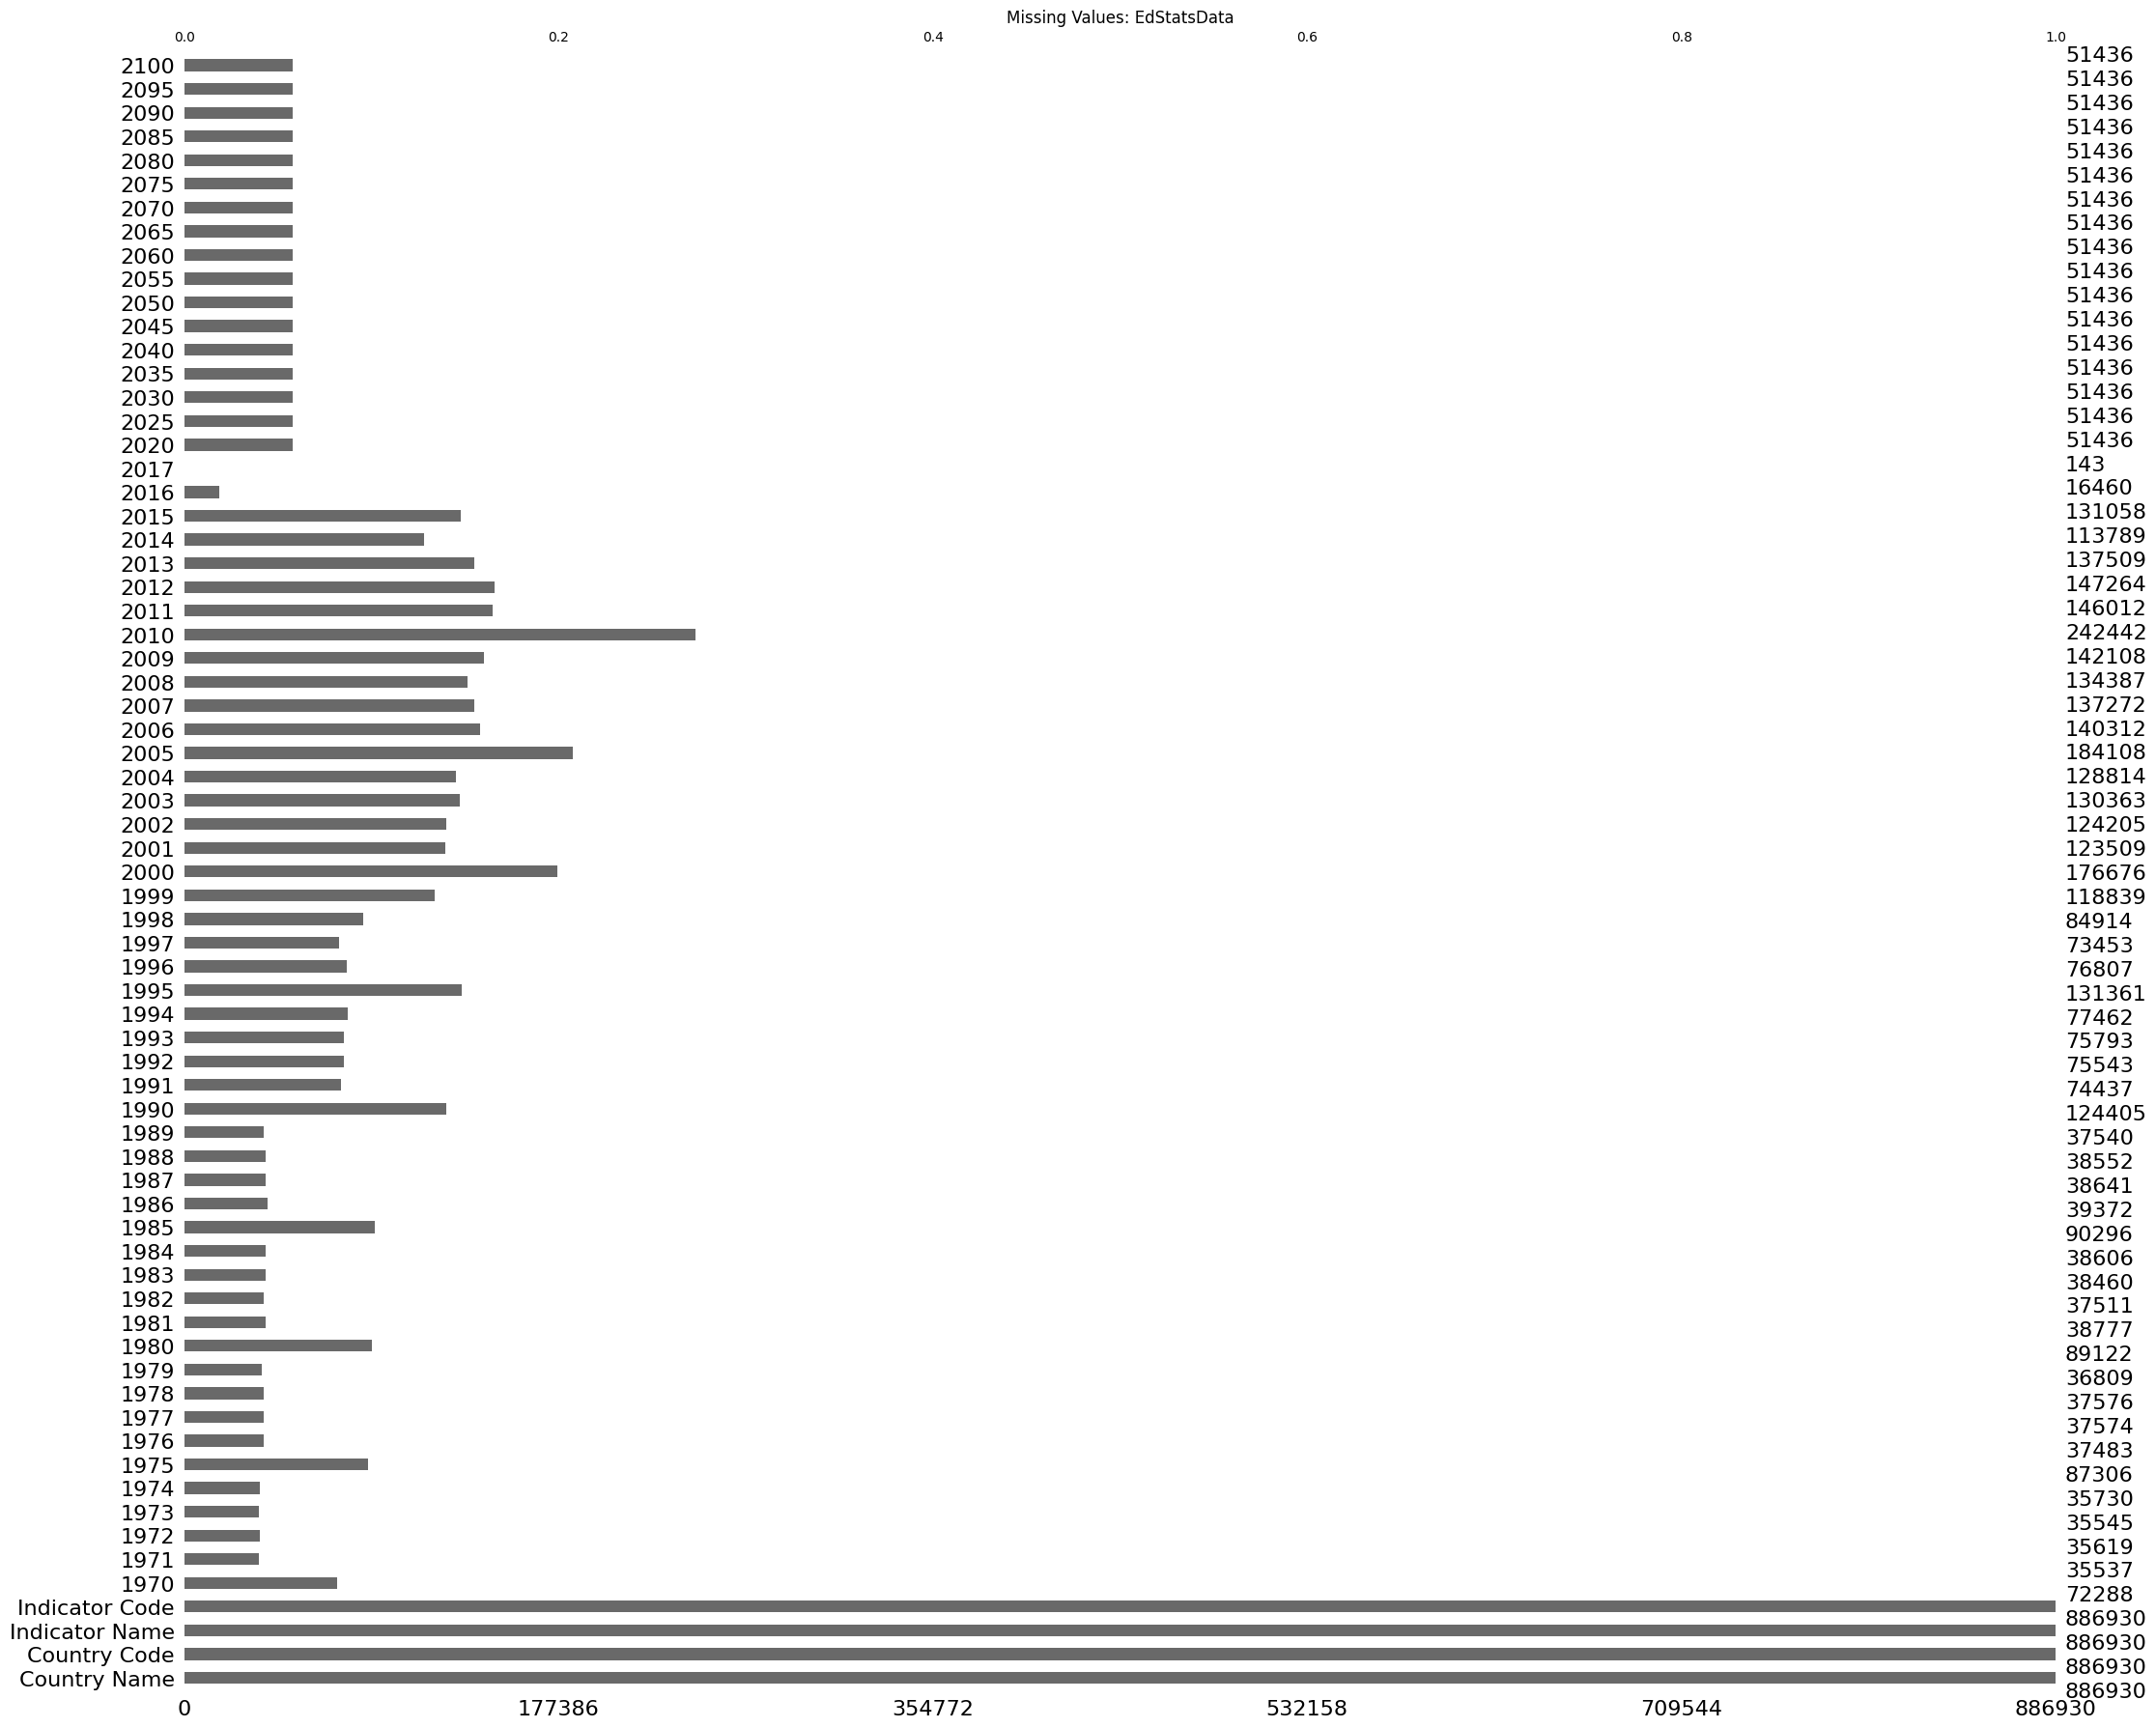

Visualizing missing values for: EdStatsCountry


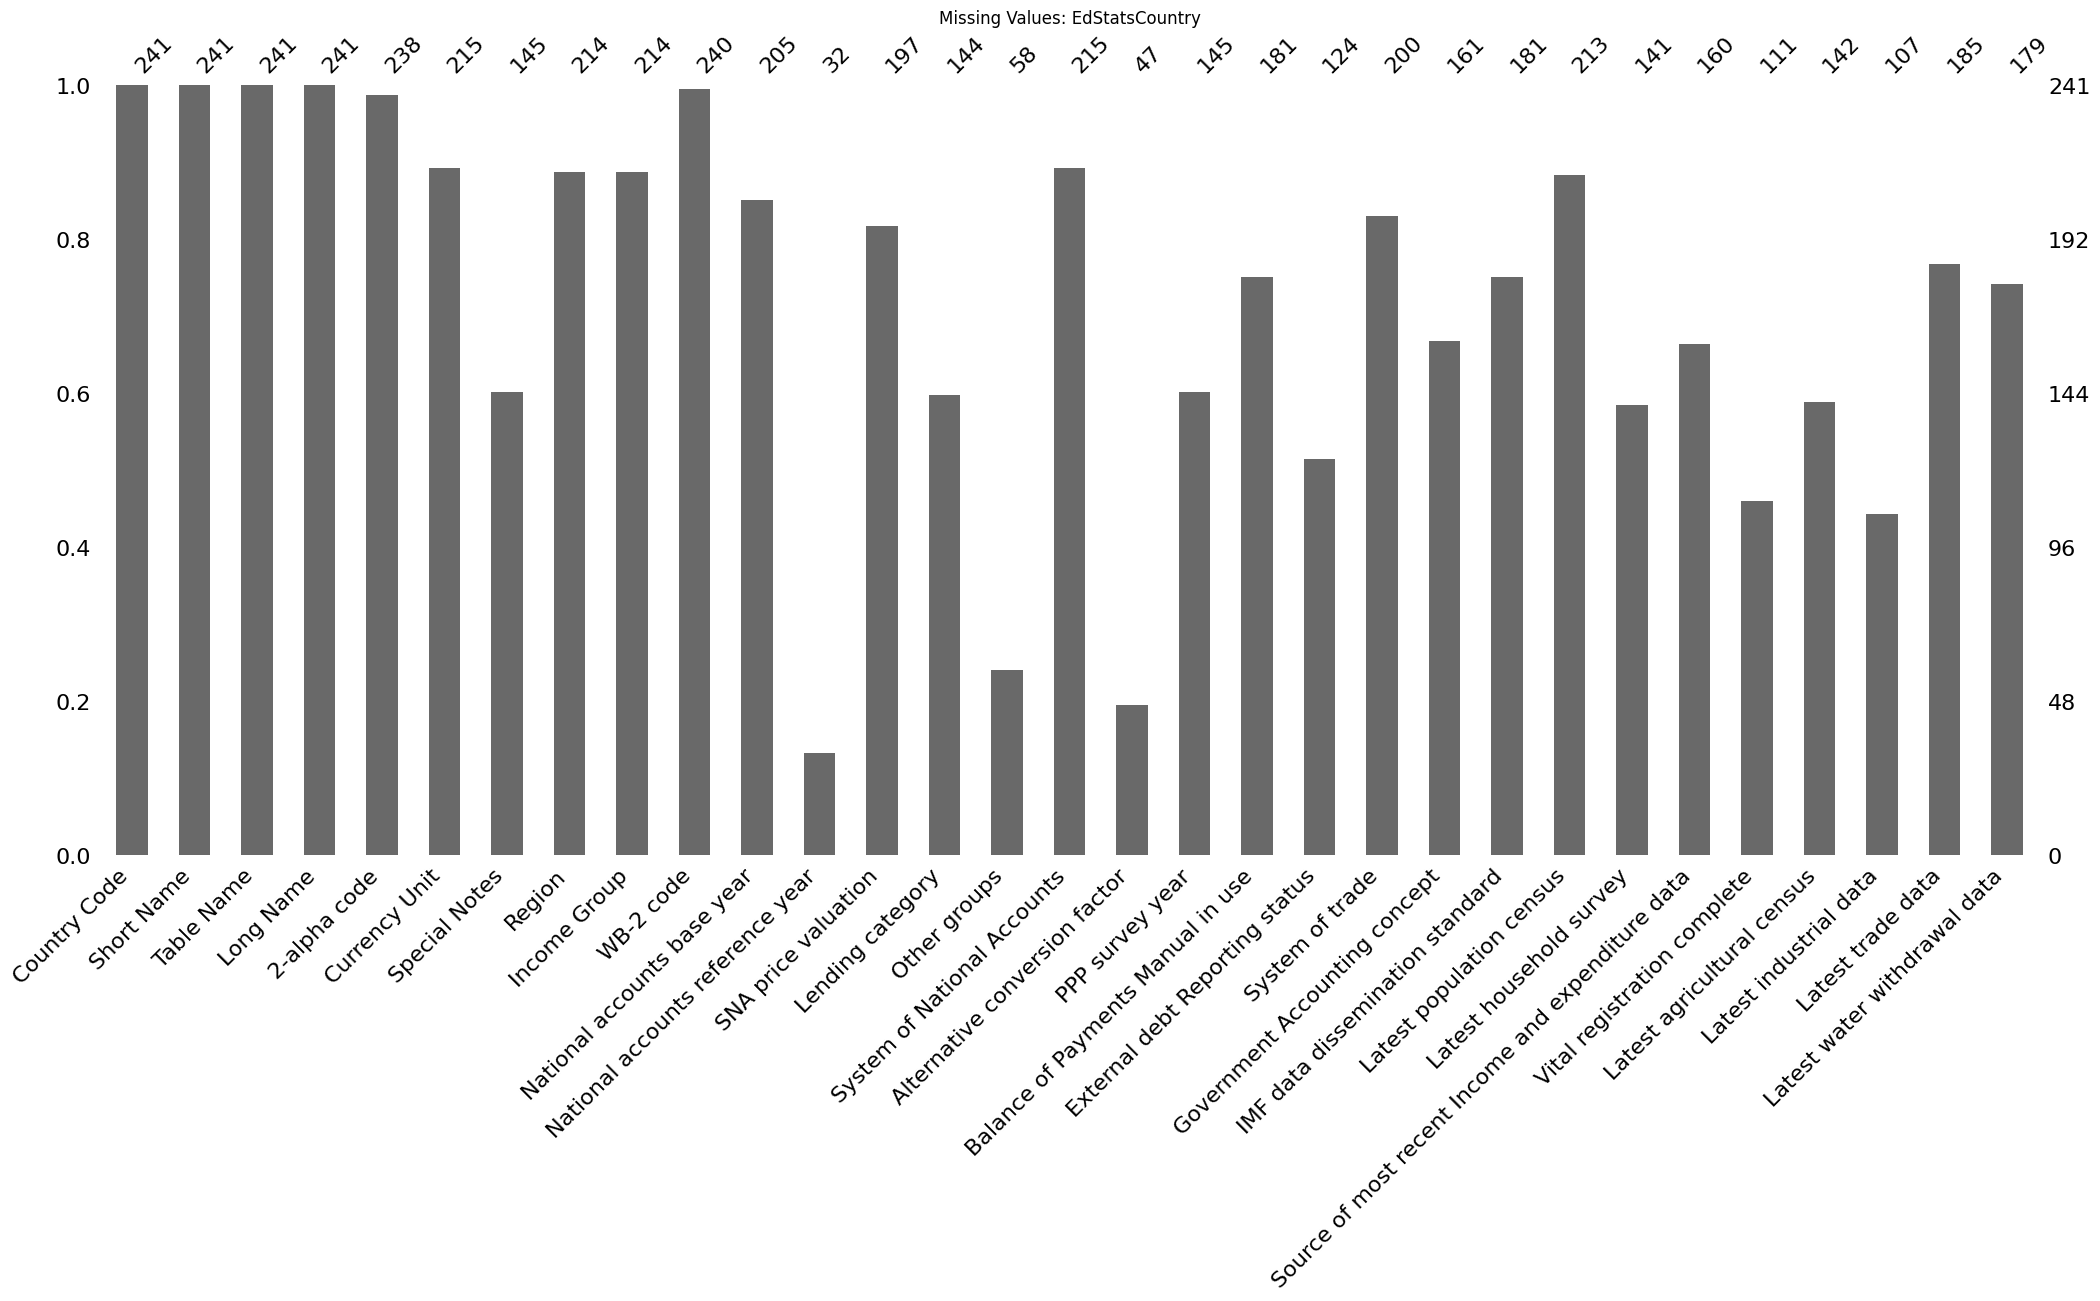

Visualizing missing values for: EdStatsCountrySeries


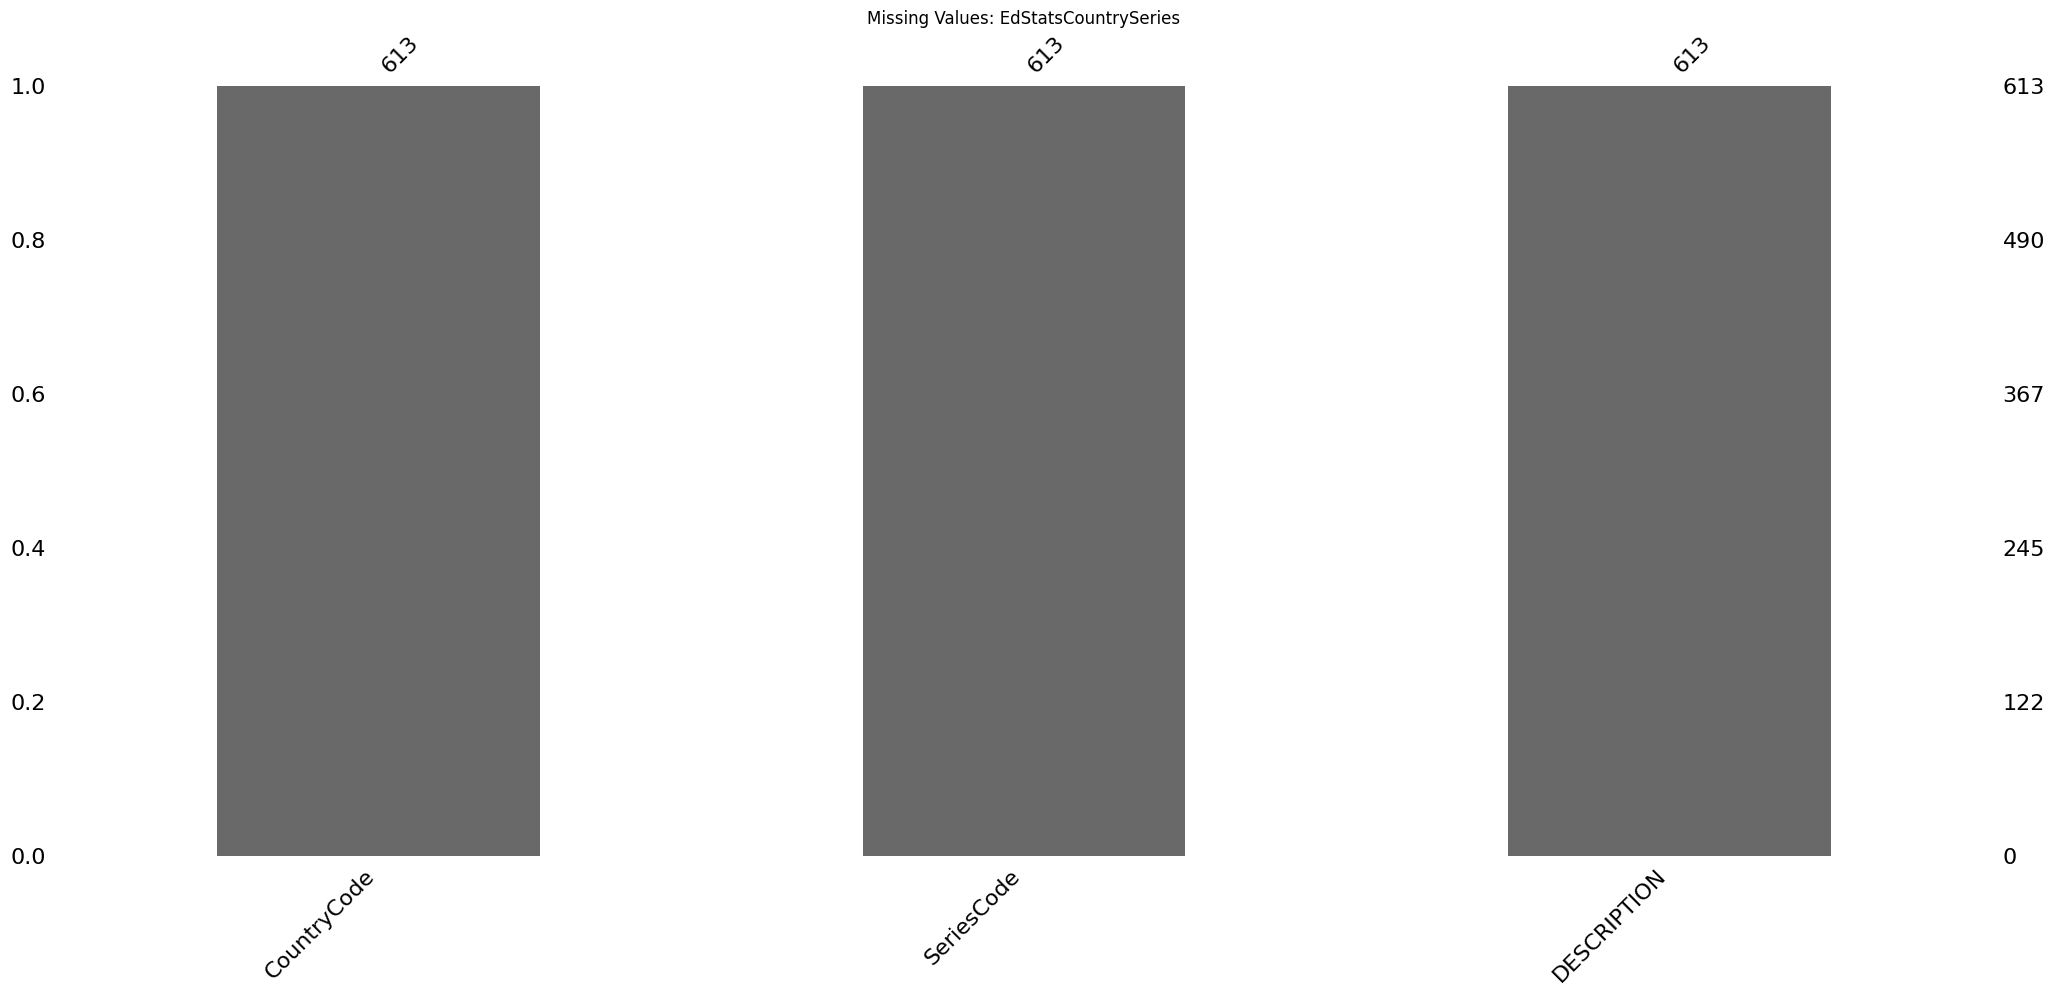

Visualizing missing values for: EdStatsFootNote


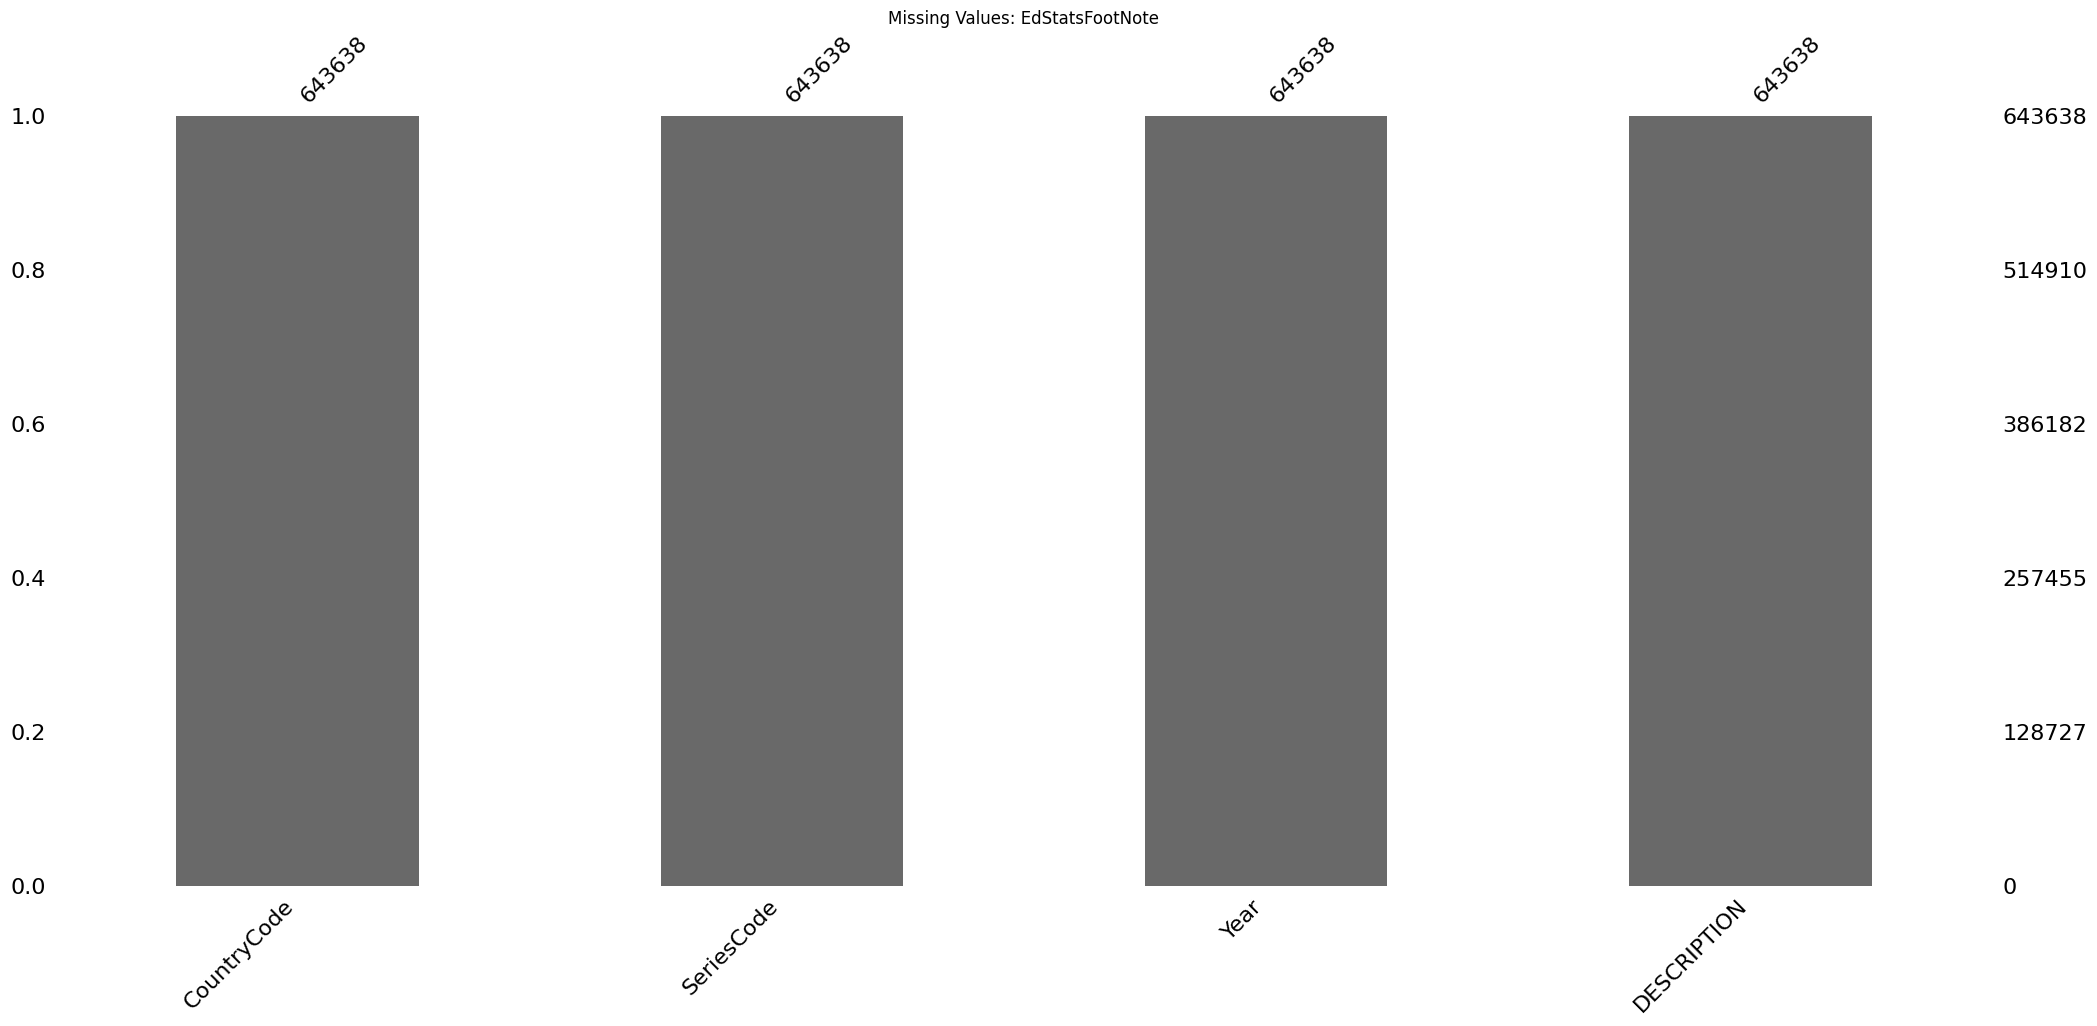

Visualizing missing values for: EdStatsSeries


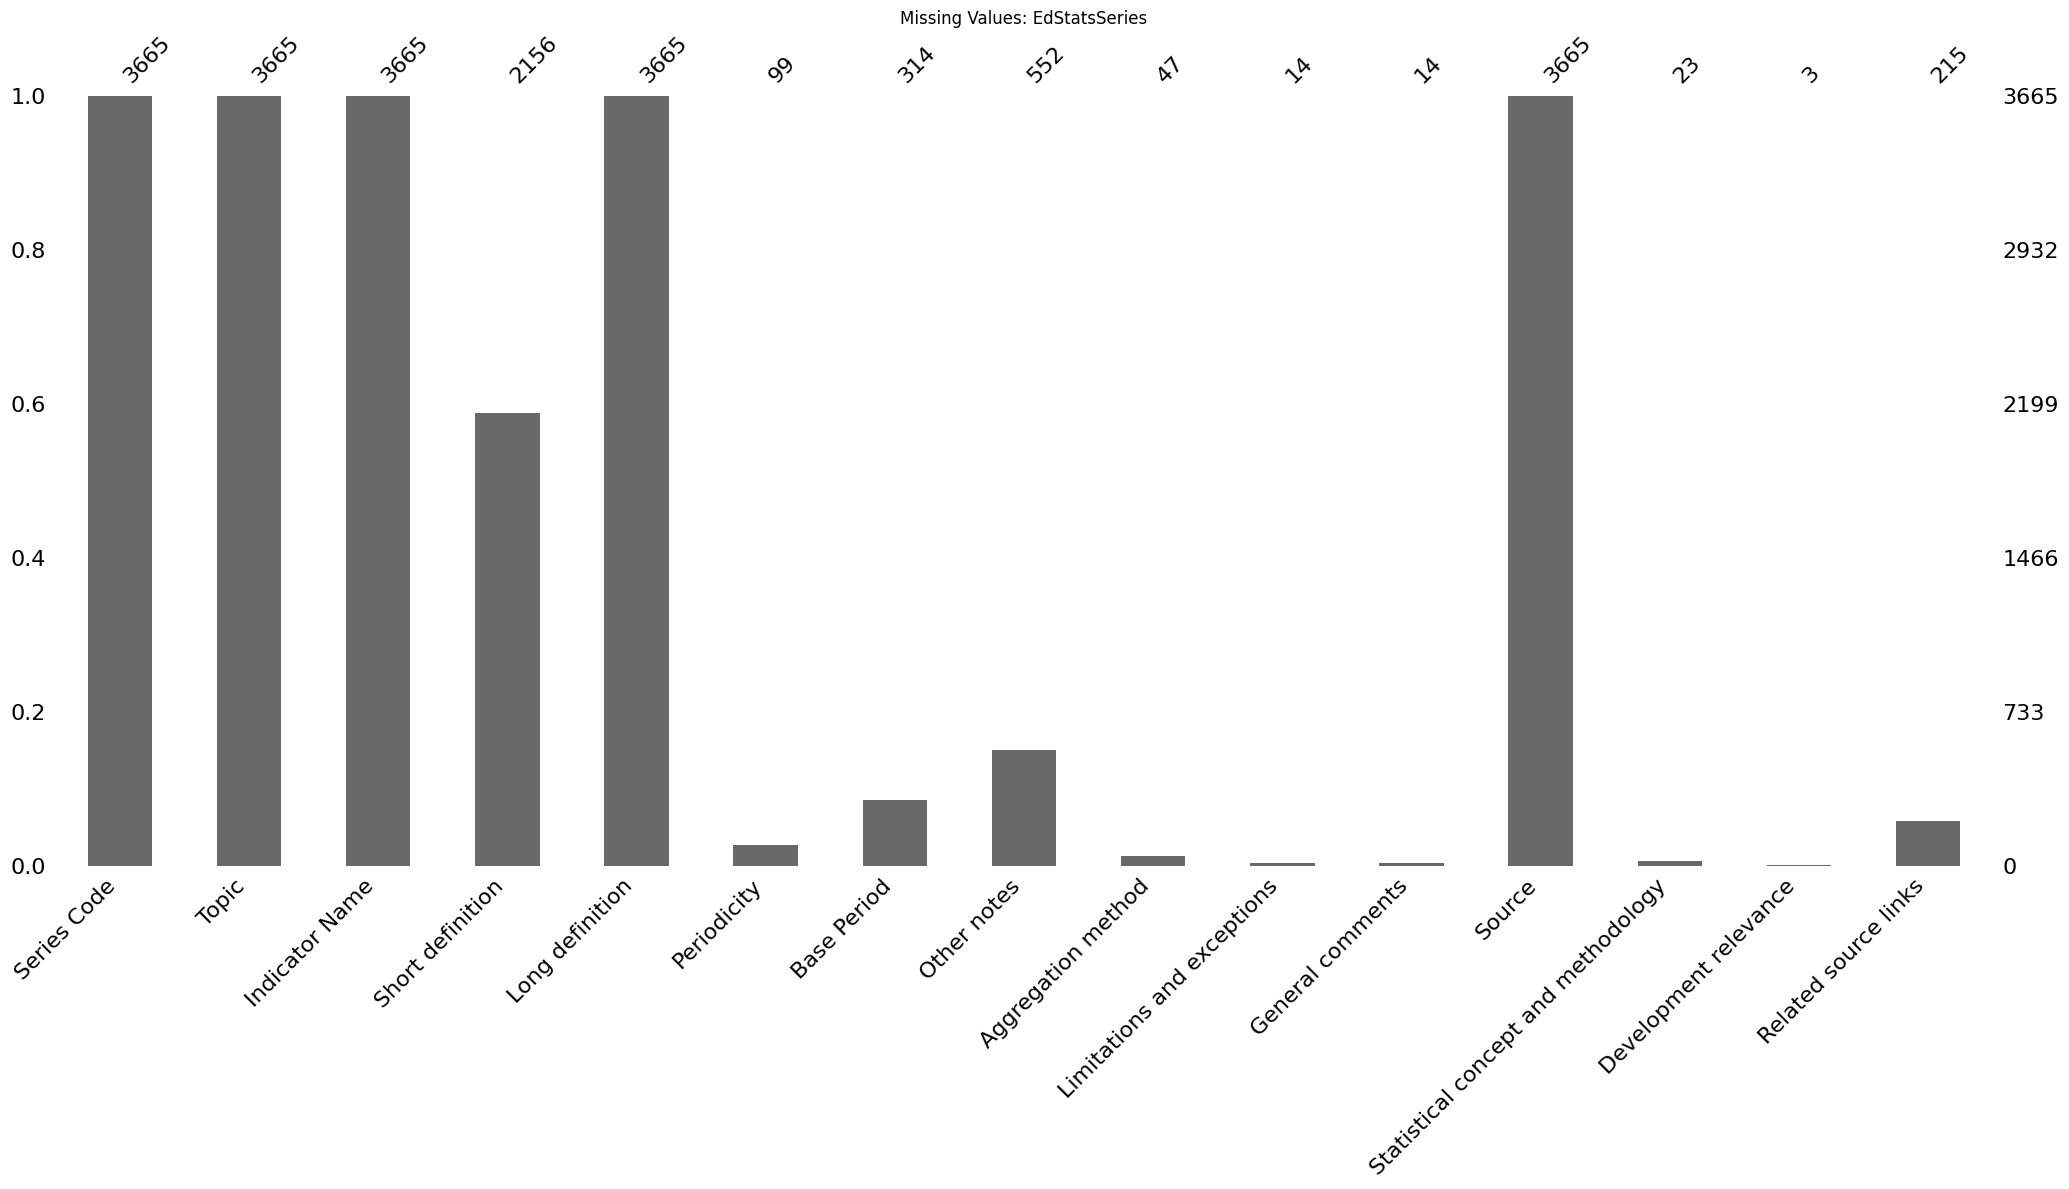

Total missing values in EdStatsData: 52568249
Total missing values in EdStatsCountry: 2113
Total missing values in EdStatsCountrySeries: 0
Total missing values in EdStatsFootNote: 0
Total missing values in EdStatsSeries: 33213


In [14]:
# Step 6: Visualize Missing Values
for name, df in datasets.items():
    if df is not None:
        visualize_missing_values(df, name)

# Step 7: Handle Missing Values
for name, df in datasets.items():
    if df is not None:
        print(f"Total missing values in {name}: {df.isnull().sum().sum()}")


In [15]:
series_df = datasets.get("EdStatsSeries")

if series_df is not None:
    unique_indicator_names = series_df[['Series Code', 'Indicator Name', 'Long definition']]['Indicator Name'].unique()
    print("Unique Indicator Names:")
for i in unique_indicator_names:
  print(i)


Unique Indicator Names:
Barro-Lee: Percentage of female population age 15-19 with no education
Barro-Lee: Percentage of population age 15-19 with no education
Barro-Lee: Percentage of female population age 15+ with no education
Barro-Lee: Percentage of population age 15+ with no education
Barro-Lee: Percentage of female population age 20-24 with no education
Barro-Lee: Percentage of population age 20-24 with no education
Barro-Lee: Percentage of female population age 25-29 with no education
Barro-Lee: Percentage of population age 25-29 with no education
Barro-Lee: Percentage of female population age 25+ with no education
Barro-Lee: Percentage of population age 25+ with no education
Barro-Lee: Percentage of female population age 30-34 with no education
Barro-Lee: Percentage of population age 30-34 with no education
Barro-Lee: Percentage of female population age 35-39 with no education
Barro-Lee: Percentage of population age 35-39 with no education
Barro-Lee: Percentage of female populat

In [16]:
selections = ["Personal computers (per 100 people)",
              "Internet users (per 100 people)",
              "Enrolment in tertiary education, all programmes, both sexes (number)",
              "Population, ages 15-24, total",
              "Government expenditure on education as % of GDP (%)",
              "Enrolment in upper secondary education, both sexes (number)" ]
relevant_indicators = series_df[series_df['Indicator Name'].isin(selections)][['Series Code', 'Indicator Name', 'Long definition']]
display(relevant_indicators)
indicators = relevant_indicators['Series Code'].tolist()


Series Code                                     Indicator Name  \
610      IT.CMP.PCMP.P2                Personal computers (per 100 people)   
611      IT.NET.USER.P2                    Internet users (per 100 people)   
2332        SE.TER.ENRL  Enrolment in tertiary education, all programme...   
2381  SE.XPD.TOTL.GD.ZS  Government expenditure on education as % of GD...   
2506  SP.POP.1524.TO.UN                      Population, ages 15-24, total   
2825            UIS.E.3  Enrolment in upper secondary education, both s...   

                                        Long definition  
610   Personal computers are self-contained computer...  
611   Internet users are individuals who have used t...  
2332  The total number of students enrolled at publi...  
2381  Total general (local, regional and central) go...  
2506  Population, ages 15-24, total is the total pop...  
2825  Total number of students enrolled in public an...

In [17]:
# years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
years = [str(year) for year in range(2005, 2016)]
# years = ['2015']


In [18]:
if datasets.get("EdStatsData") is not None:
    data_df = datasets["EdStatsData"]
    filtered_data = data_df[data_df['Indicator Code'].isin(indicators)]
    filtered_data = filtered_data.dropna(how='all', subset=years)

    # Keep relevant columns
    cols_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years
    filtered_data = filtered_data[cols_to_keep]

In [19]:
# Display filtered data
print("Filtered Data for Selected Indicators:")
print(filtered_data.head())

Filtered Data for Selected Indicators:
             Country Name Country Code  \
1204           Arab World          ARB   
1214           Arab World          ARB   
1375           Arab World          ARB   
2084           Arab World          ARB   
4869  East Asia & Pacific          EAS   

                                         Indicator Name  Indicator Code  \
1204  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
1214  Enrolment in upper secondary education, both s...         UIS.E.3   
1375                    Internet users (per 100 people)  IT.NET.USER.P2   
2084                Personal computers (per 100 people)  IT.CMP.PCMP.P2   
4869  Enrolment in tertiary education, all programme...     SE.TER.ENRL   

              2005          2006          2007          2008          2009  \
1204  6.899156e+06  7.214648e+06  7.588664e+06  8.006892e+06  8.382284e+06   
1214  1.073953e+07  1.070008e+07  1.037482e+07  1.030286e+07  1.017877e+07   
1375  8.393142e+00  1.1

In [20]:
# Step 7: Add Region and Income Group Data
if datasets.get("EdStatsCountry") is not None:
    country_df = datasets["EdStatsCountry"]
    if 'Region' in country_df.columns and 'Income Group' in country_df.columns:
        filtered_data = filtered_data.merge(country_df[['Country Code', 'Region', 'Income Group']], on='Country Code', how='left')

        # Reorganize columns
        filtered_data = filtered_data[['Country Name', 'Country Code', 'Region', 'Income Group', 'Indicator Name', 'Indicator Code'] + years]

In [21]:
# Filter from years to select the data is not None
filtered_data.head()

Country Name Country Code Region Income Group  \
0           Arab World          ARB    NaN          NaN   
1           Arab World          ARB    NaN          NaN   
2           Arab World          ARB    NaN          NaN   
3           Arab World          ARB    NaN          NaN   
4  East Asia & Pacific          EAS    NaN          NaN   

                                      Indicator Name  Indicator Code  \
0  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
1  Enrolment in upper secondary education, both s...         UIS.E.3   
2                    Internet users (per 100 people)  IT.NET.USER.P2   
3                Personal computers (per 100 people)  IT.CMP.PCMP.P2   
4  Enrolment in tertiary education, all programme...     SE.TER.ENRL   

           2005          2006          2007          2008          2009  \
0  6.899156e+06  7.214648e+06  7.588664e+06  8.006892e+06  8.382284e+06   
1  1.073953e+07  1.070008e+07  1.037482e+07  1.030286e+07  1.017877e+07   
2  8.393142e+00  1.165465e+01  1.420590e+01  1.859353e+01  2.297369e+01   
3  5.305007e+00  6.676681e+00           NaN           NaN           NaN   
4  4.118044e+07  4.421611e+07  4.689837e+07  4.929505e+07  5.267760e+07   

           2010          2011          2012          2013        2014  2015  
0  8.715273e+06  8.594488e+06  9.147083e+06  9.688632e+06   9966484.0   NaN  
1  1.064478e+07  1.162018e+07  1.202761e+07  1.202161e+07  11995984.0   NaN  
2  2.674725e+01  2.970776e+01  3.401422e+01  3.686860e+01         NaN   NaN  
3           NaN           NaN           NaN           NaN         NaN   NaN  
4  5.523363e+07  5.658473e+07  5.887421e+07  6.091618e+07  69097800.0   NaN

In [22]:
def last_valid_value(row):
    """Get the last valid value from a row."""
    return row.last_valid_index() and row[row.last_valid_index()]

if 'Last_Value' not in filtered_data.columns:
    filtered_data['Last_Value'] = filtered_data[years].apply(last_valid_value, axis=1)

pivot_data = pd.pivot_table(filtered_data, values='Last_Value', index=['Country Name', 'Country Code', 'Region', 'Income Group'], columns='Indicator Code')
pivot_data.reset_index(inplace=True)

# Display pivot data
print("Pivoted Data for Analysis:")
print(pivot_data.head())


Pivoted Data for Analysis:
Indicator Code    Country Name Country Code                      Region  \
0                  Afghanistan          AFG                  South Asia   
1                      Albania          ALB       Europe & Central Asia   
2                      Algeria          DZA  Middle East & North Africa   
3               American Samoa          ASM         East Asia & Pacific   
4                      Andorra          AND       Europe & Central Asia   

Indicator Code          Income Group  IT.CMP.PCMP.P2  IT.NET.USER.P2  \
0                         Low income        0.390148        8.260000   
1                Upper middle income        4.593538       63.252933   
2                Upper middle income        1.030597       38.200000   
3                Upper middle income             NaN             NaN   
4               High income: nonOECD             NaN       96.910000   

Indicator Code  SE.TER.ENRL  SE.XPD.TOTL.GD.ZS  SP.POP.1524.TO.UN    UIS.E.3  
0         

https://plotly.com/python/box-plots/
Standard scaler / MinMax Scalar for each indicators for df_data


In [23]:
for indicator in indicators:
    indicator = pivot_data[[indicator,'Region']].groupby('Region',as_index = True).describe()
    indicator.reset_index(inplace = True)
    display(indicator)

Indicator Code                      Region IT.CMP.PCMP.P2             \
                                                    count       mean   
0                      East Asia & Pacific           26.0  17.476976   
1                    Europe & Central Asia           46.0  34.089631   
2                Latin America & Caribbean           30.0   9.658054   
3               Middle East & North Africa           18.0  15.519235   
4                            North America            2.0  87.181097   
5                               South Asia            7.0   4.566140   
6                       Sub-Saharan Africa           45.0   3.469602   

Indicator Code                                                         \
                      std        min        25%        50%        75%   
0               21.966392   0.378256   4.912923   6.967330  21.578879   
1               27.848185   0.817567   9.553901  26.759450  57.204113   
2                5.719571   0.877393   5.335933   9.589182  13.499037   
3               17.594009   1.030597   4.745904   9.398810  17.489613   
4               10.275123  79.915488  83.548292  87.181097  90.813901   
5                6.836356   0.390148   1.236161   2.415981   3.435552   
6                5.546605   0.022211   0.646019   1.081776   3.726937   

Indicator Code             
                      max  
0               72.061563  
1               96.170657  
2               23.147452  
3               65.234645  
4               94.446705  
5               19.813424  
6               24.030374

Indicator Code                      Region IT.NET.USER.P2             \
                                                    count       mean   
0                      East Asia & Pacific           33.0  45.892811   
1                    Europe & Central Asia           54.0  72.064166   
2                Latin America & Caribbean           37.0  53.097023   
3               Middle East & North Africa           21.0  55.447096   
4                            North America            3.0  87.115937   
5                               South Asia            8.0  25.561539   
6                       Sub-Saharan Africa           47.0  18.187042   

Indicator Code                                                         \
                      std        min        25%        50%        75%   
0               28.397358   0.000000  21.725834  42.500000  73.140000   
1               19.113764  14.996775  63.746345  72.867350  87.214825   
2               18.136996  12.197700  41.590000  54.215766  65.000000   
3               25.724417  11.922431  37.819383  57.424192  76.184000   
4               11.942416  74.554202  81.512101  88.470000  93.396805   
5               15.487468   8.260000  14.300000  21.790809  32.441553   
6               14.154121   1.083733   7.289581  16.500000  24.750000   

Indicator Code             
                      max  
0               91.058028  
1               98.200000  
2               88.661227  
3               93.478301  
4               98.323610  
5               54.461955  
6               54.259618

Indicator Code                      Region SE.TER.ENRL                \
                                                 count          mean   
0                      East Asia & Pacific        24.0  2.865420e+06   
1                    Europe & Central Asia        51.0  7.394874e+05   
2                Latin America & Caribbean        33.0  7.535861e+05   
3               Middle East & North Africa        20.0  7.359253e+05   
4                            North America         2.0  9.766350e+06   
5                               South Asia         8.0  4.634772e+06   
6                       Sub-Saharan Africa        43.0  1.796277e+05   

Indicator Code                                                               \
                         std     min         25%           50%          75%   
0               8.755059e+06   863.0    27716.50  2.843585e+05   2293248.25   
1               1.341303e+06   501.0   108070.00  2.653820e+05    523199.00   
2               1.616222e+06   194.0     3508.00  1.793960e+05    480103.00   
3               1.182481e+06  4705.0   113156.75  2.901240e+05    799008.75   
4               1.381033e+07   973.0  4883661.75  9.766350e+06  14649039.25   
5               1.113027e+07  6089.0   199291.25  3.766620e+05   1920770.00   
6               2.994305e+05  1035.0    20253.50  7.115400e+04    166689.50   

Indicator Code              
                       max  
0               43367392.0  
1                6592416.0  
2                8285475.0  
3                4802721.0  
4               19531728.0  
5               32107420.0  
6                1513371.0

Indicator Code                      Region SE.XPD.TOTL.GD.ZS            \
                                                       count      mean   
0                      East Asia & Pacific              22.0  4.883512   
1                    Europe & Central Asia              48.0  4.768602   
2                Latin America & Caribbean              31.0  5.106069   
3               Middle East & North Africa              17.0  4.408587   
4                            North America               3.0  4.122100   
5                               South Asia               8.0  3.780047   
6                       Sub-Saharan Africa              45.0  4.426413   

Indicator Code                                                             
                     std      min       25%       50%       75%       max  
0               2.524576  1.90197  3.328380  4.364370  5.468737  12.46775  
1               1.613590  1.02195  3.941918  4.839005  5.506507   8.62711  
2               2.016630  2.04457  3.761855  4.955400  6.078440  12.83727  
3               1.567087  1.32232  3.607190  4.480790  5.147430   7.84900  
4               2.094468  1.70430  3.492760  5.281220  5.331000   5.38078  
5               1.785019  1.95726  2.529835  3.514850  4.187647   7.36169  
6               2.281782  1.09972  2.757560  3.797460  5.607990  11.36114

Indicator Code                      Region SP.POP.1524.TO.UN                \
                                                       count          mean   
0                      East Asia & Pacific              30.0  1.113271e+07   
1                    Europe & Central Asia              47.0  2.298638e+06   
2                Latin America & Caribbean              35.0  3.044773e+06   
3               Middle East & North Africa              21.0  3.530033e+06   
4                            North America               3.0  1.650938e+07   
5                               South Asia               8.0  4.185906e+07   
6                       Sub-Saharan Africa              47.0  4.203060e+06   

Indicator Code                                                            \
                         std      min        25%        50%          75%   
0               3.616593e+07   2825.0    66255.5   767924.5   6175581.25   
1               3.359697e+06   8715.0   517366.5  1034603.0   2126549.50   
2               6.553111e+06   5789.0    49422.5   850912.0   2430972.50   
3               4.389639e+06  51504.0   583565.0  1211599.0   5995687.00   
4               2.489726e+07   7102.0  2190306.5  4373511.0  24760514.00   
5               8.314867e+07  69984.0  2277826.5  7032757.5  35570648.25   
6               6.420711e+06  14460.0   512427.5  2265841.0   4604884.50   

Indicator Code               
                        max  
0               197026759.0  
1                14661984.0  
2                33595574.0  
3                15377746.0  
4                45147517.0  
5               244120201.0  
6                36659023.0

Indicator Code                      Region UIS.E.3                \
                                             count          mean   
0                      East Asia & Pacific    30.0  2.301114e+06   
1                    Europe & Central Asia    52.0  6.864309e+05   
2                Latin America & Caribbean    37.0  6.784072e+05   
3               Middle East & North Africa    21.0  7.235323e+05   
4                            North America     3.0  4.423299e+06   
5                               South Asia     7.0  9.918573e+06   
6                       Sub-Saharan Africa    45.0  4.242406e+05   

Indicator Code                                                            \
                         std      min         25%        50%         75%   
0               8.051461e+06    353.0    14285.00   128812.5  1209855.00   
1               1.084600e+06   1288.0    92871.75   260119.0   563130.00   
2               1.775980e+06    800.0     5391.00   122666.0   580335.00   
3               1.039395e+06  17418.0   108681.00   355009.0   730640.00   
4               6.379245e+06   2188.0   766790.50  1531393.0  6633854.00   
5               2.009410e+07  20735.0  1114517.00  1341007.0  5305280.25   
6               8.214533e+05   2624.0    48999.00   142754.0   313860.00   

Indicator Code              
                       max  
0               43709224.0  
1                4995623.0  
2                9949583.0  
3                3691835.0  
4               11736315.0  
5               55228676.0  
6                4046541.0

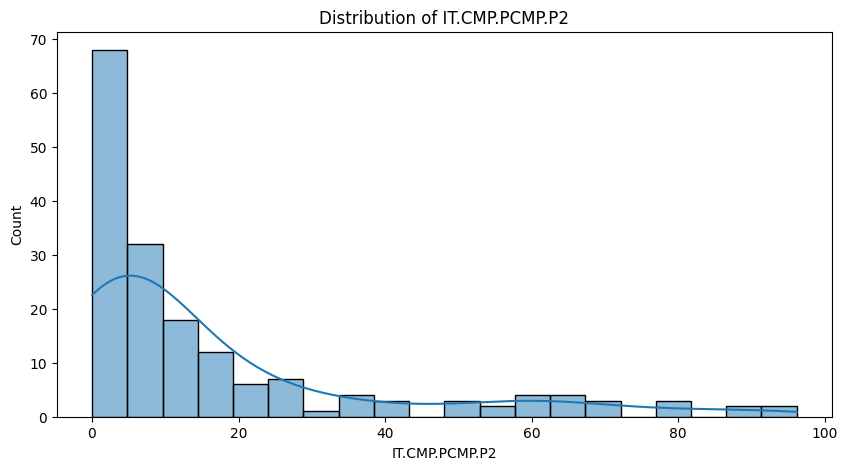

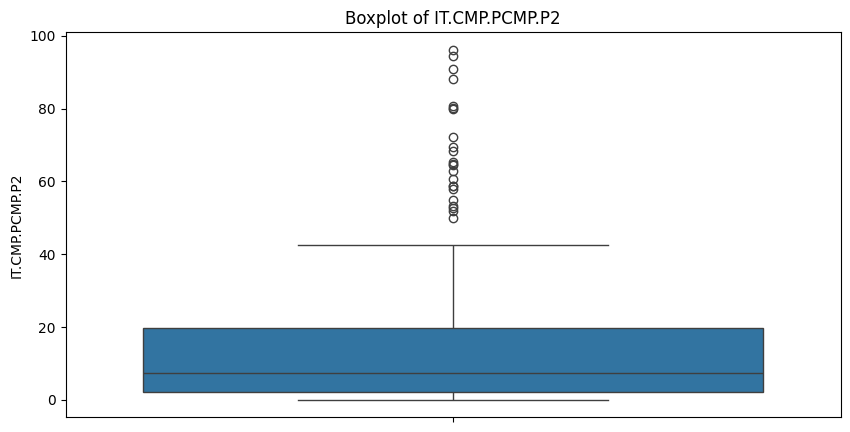

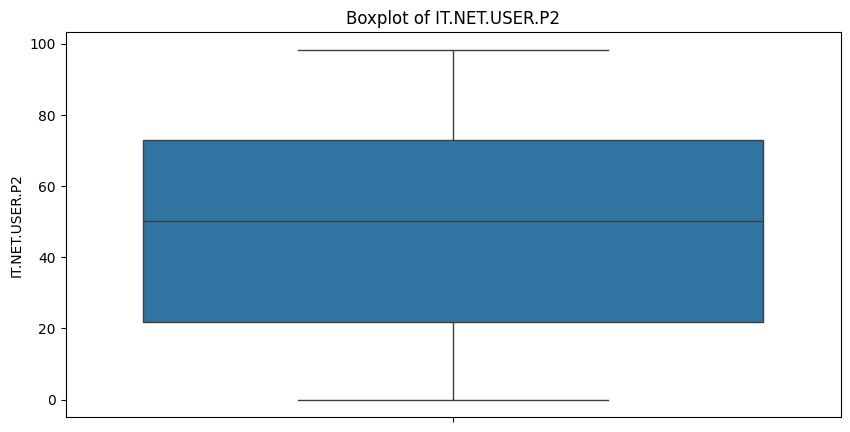

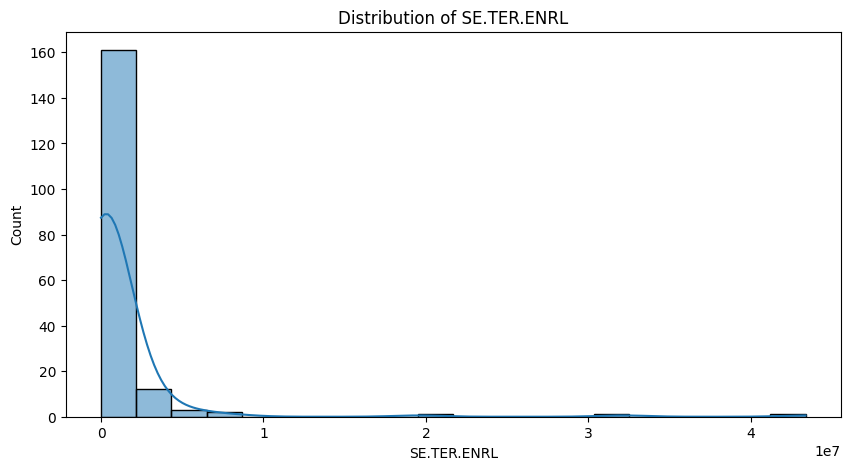

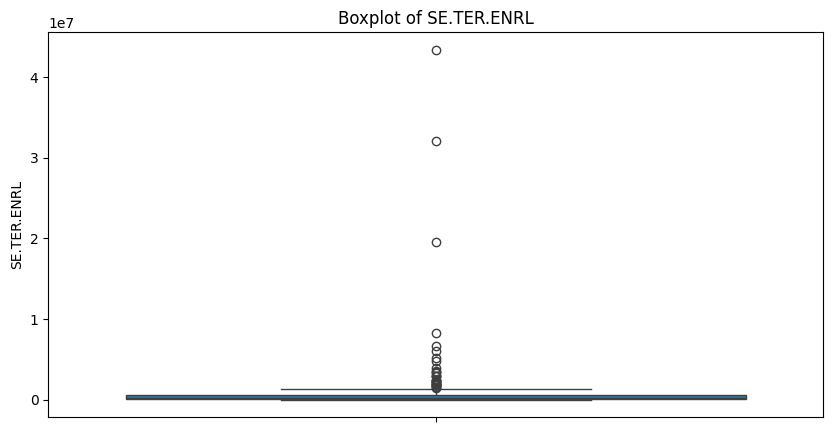

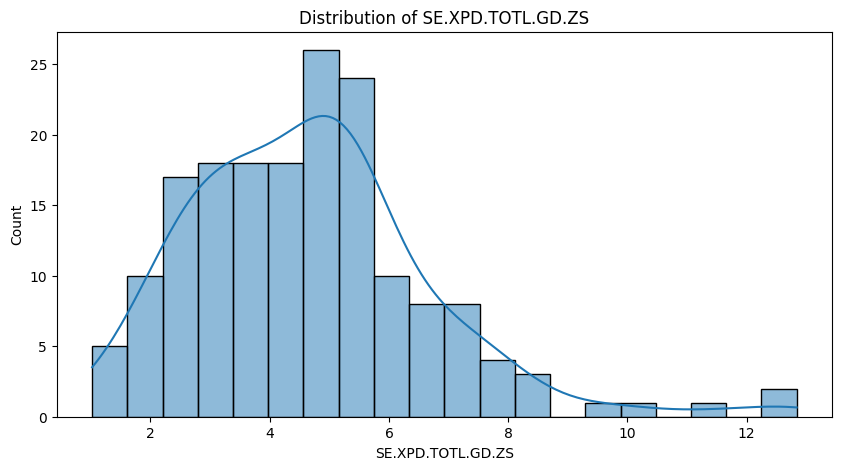

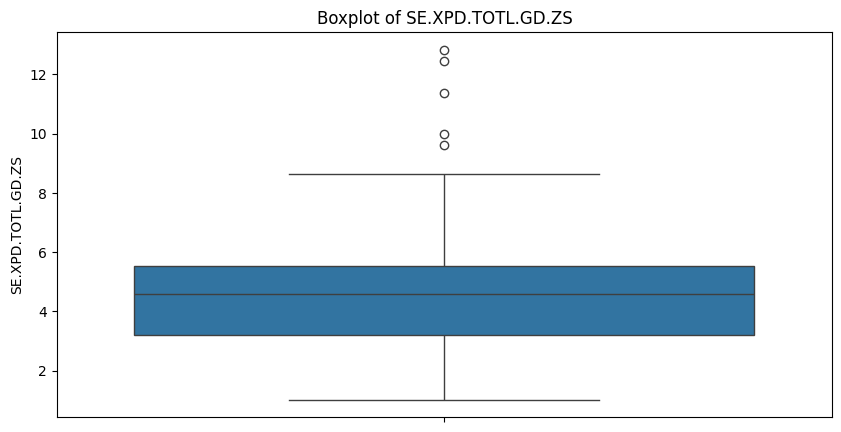

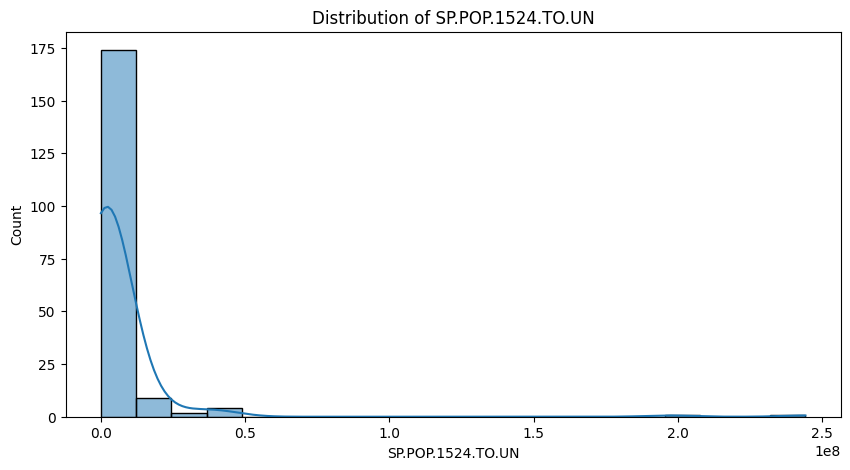

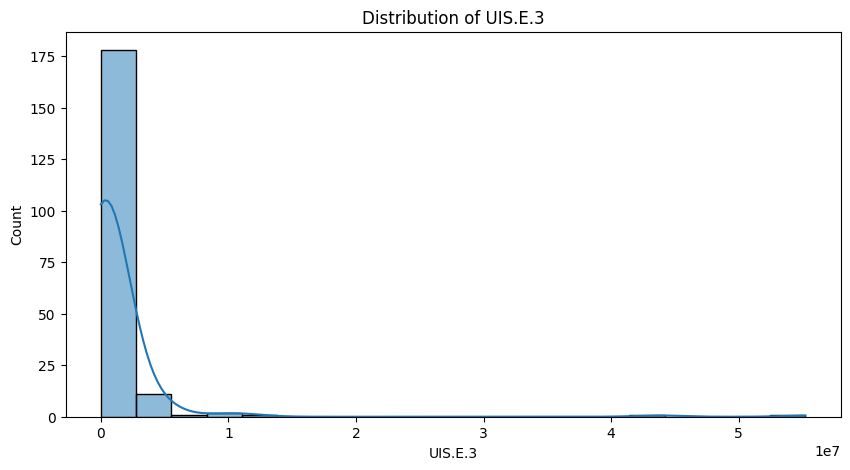

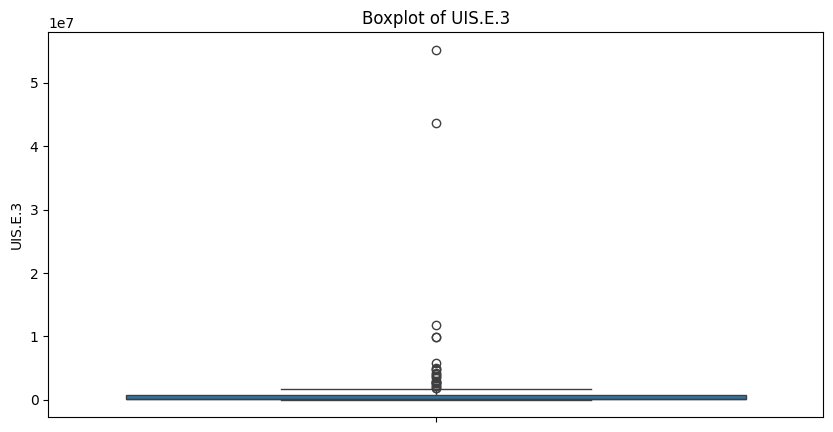

In [24]:
for indicator in indicators:
    plt.figure(figsize=(10, 5))

    # Histogram
    sns.histplot(pivot_data[indicator], kde=True, bins=20)
    plt.title(f'Distribution of {indicator}')
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=pivot_data[indicator])
    plt.title(f'Boxplot of {indicator}')
    plt.show()

In [25]:
def compute_descriptive_statistics(df, indicators):
    stats = {}
    for indicator in indicators:
        desc = df[indicator].describe()
        stats[indicator] = {
            'mean': desc['mean'],
            'median': df[indicator].median(),
            'std_dev': desc['std'],
            'variance': df[indicator].var(),
            'skewness': df[indicator].skew(),
            'kurtosis': df[indicator].kurt()
        }
    return pd.DataFrame(stats)

descriptive_stats = compute_descriptive_statistics(pivot_data, indicators)
print(descriptive_stats)

          IT.CMP.PCMP.P2  IT.NET.USER.P2   SE.TER.ENRL  SE.XPD.TOTL.GD.ZS  \
mean           16.977411       48.549447  1.162462e+06           4.662986   
median          7.380300       50.139318  1.954690e+05           4.590735   
std_dev        22.704481       28.606137  4.345294e+06           2.005918   
variance      515.493462      818.311087  1.888158e+13           4.023706   
skewness        1.836523        0.002261  7.647110e+00           1.077615   
kurtosis        2.550710       -1.272548  6.475308e+01           2.426653   

          SP.POP.1524.TO.UN       UIS.E.3  
mean           6.307118e+06  1.265712e+06  
median         1.168307e+06  1.794950e+05  
std_dev        2.344625e+07  5.208659e+06  
variance       5.497267e+14  2.713013e+13  
skewness       8.494992e+00  8.704101e+00  
kurtosis       7.835832e+01  8.182255e+01  


In [26]:
pivot_data.head()

Indicator Code    Country Name Country Code                      Region  \
0                  Afghanistan          AFG                  South Asia   
1                      Albania          ALB       Europe & Central Asia   
2                      Algeria          DZA  Middle East & North Africa   
3               American Samoa          ASM         East Asia & Pacific   
4                      Andorra          AND       Europe & Central Asia   

Indicator Code          Income Group  IT.CMP.PCMP.P2  IT.NET.USER.P2  \
0                         Low income        0.390148        8.260000   
1                Upper middle income        4.593538       63.252933   
2                Upper middle income        1.030597       38.200000   
3                Upper middle income             NaN             NaN   
4               High income: nonOECD             NaN       96.910000   

Indicator Code  SE.TER.ENRL  SE.XPD.TOTL.GD.ZS  SP.POP.1524.TO.UN    UIS.E.3  
0                  262874.0            3.31754          7252785.0   968769.0  
1                  160527.0            3.53944           556269.0   151937.0  
2                 1289474.0            4.35425          6467818.0  1332584.0  
3                    1607.0                NaN                NaN        NaN  
4                     501.0            3.25368             8715.0     1288.0

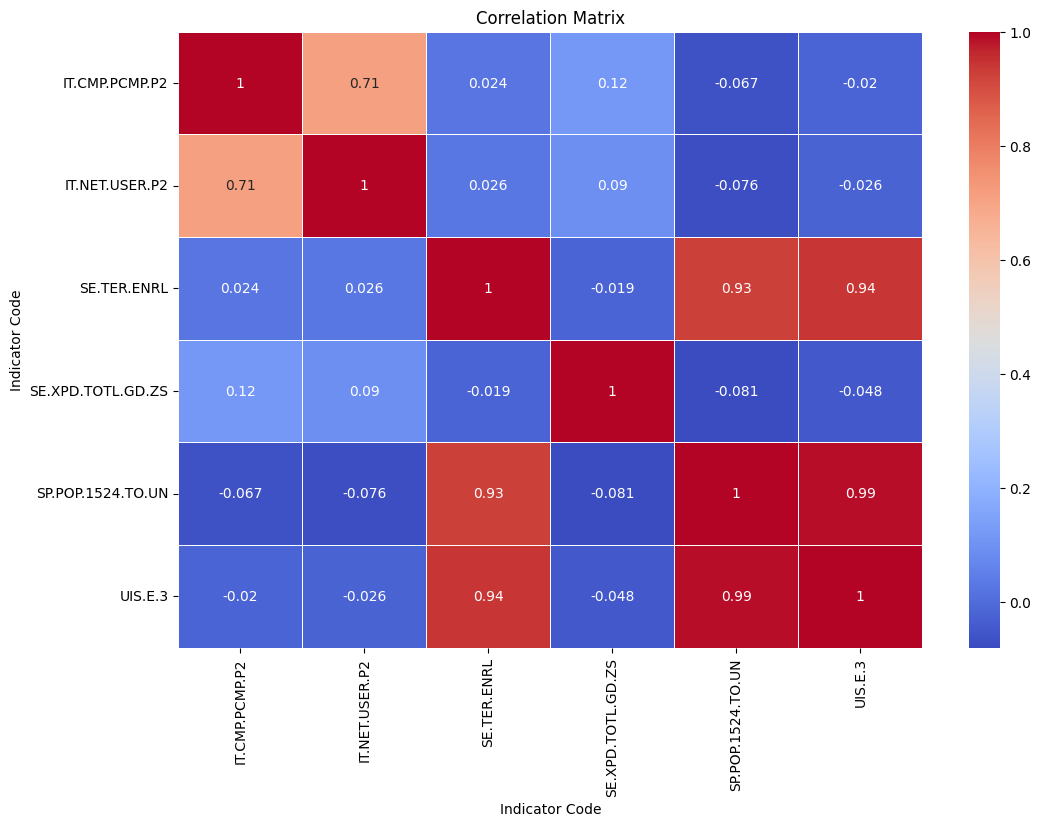

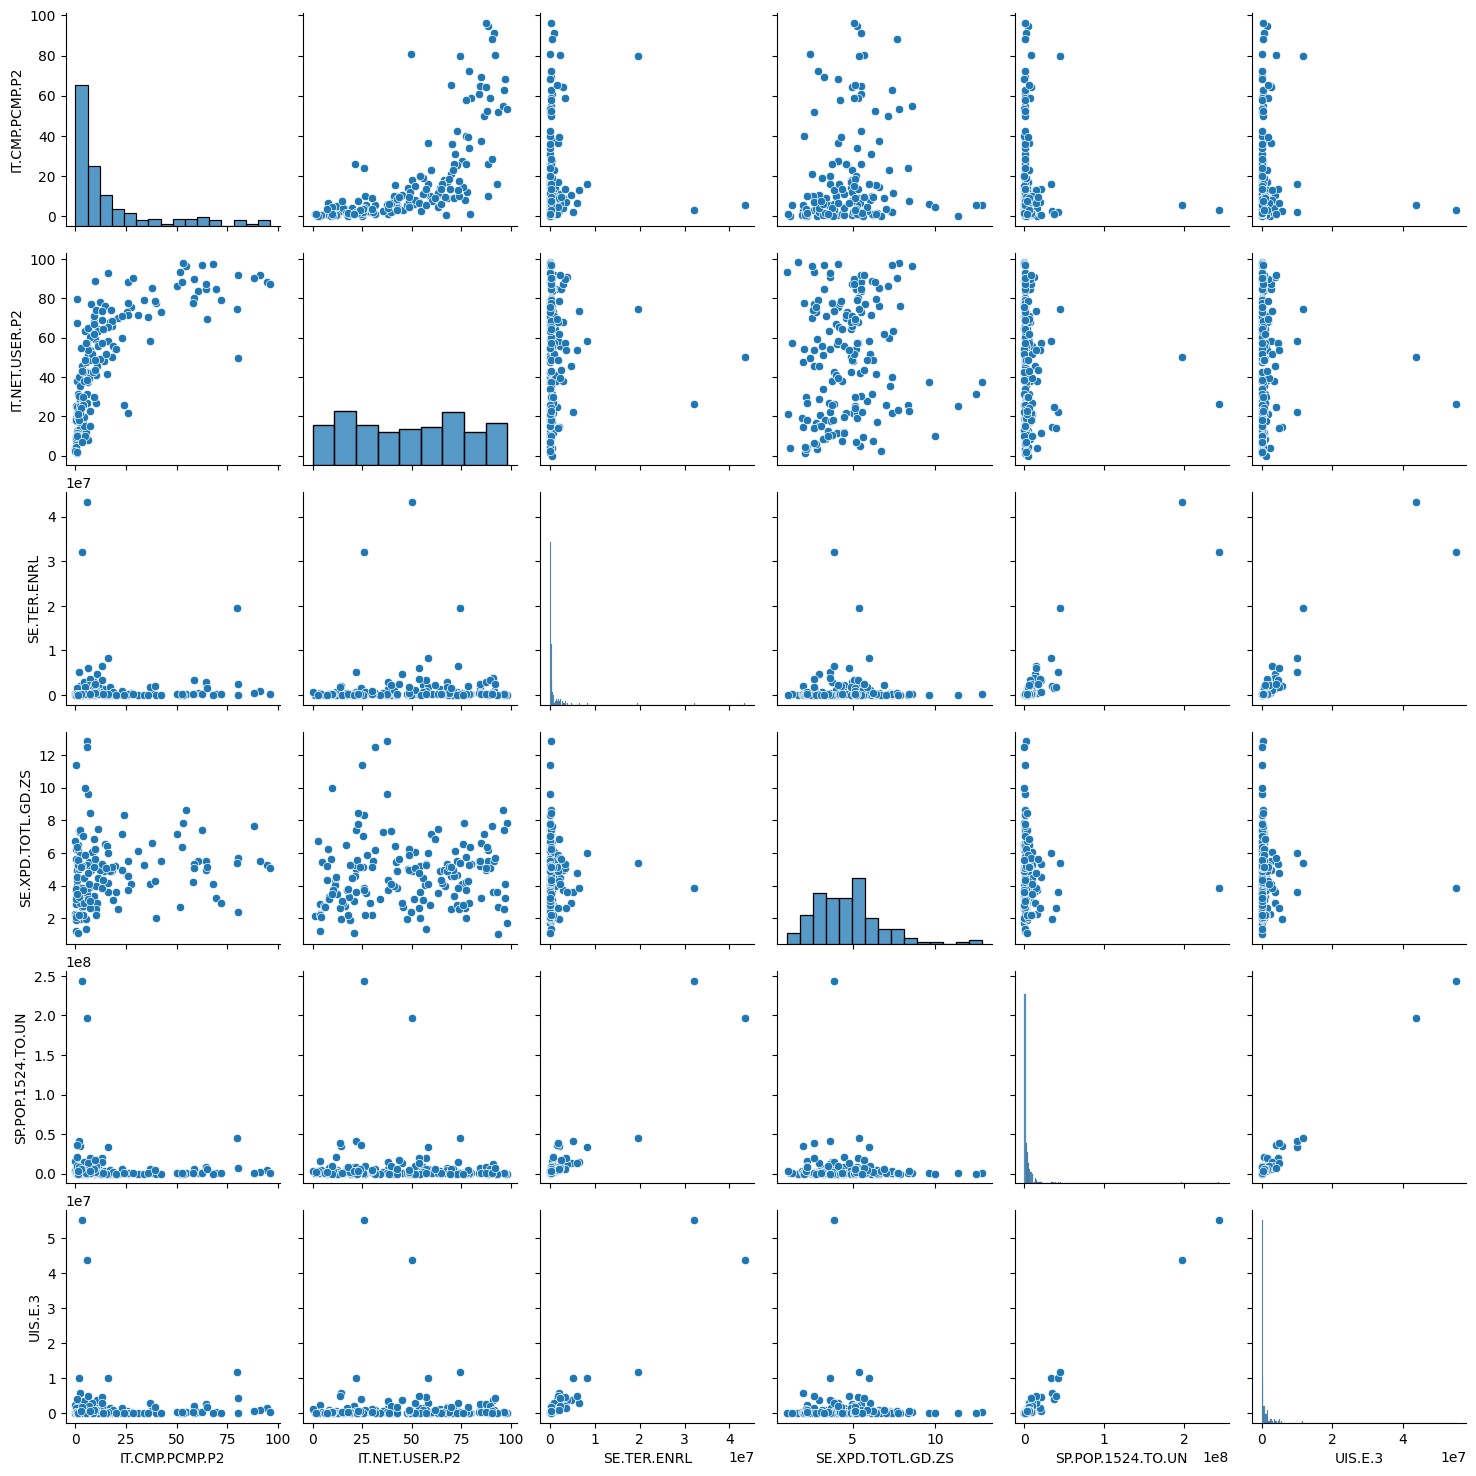

In [27]:
def plot_bivariate(df, indicators):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[indicators].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

    sns.pairplot(df[indicators])
    plt.show()

plot_bivariate(pivot_data, indicators)

In [28]:
print(indicators)

['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'SE.TER.ENRL', 'SE.XPD.TOTL.GD.ZS', 'SP.POP.1524.TO.UN', 'UIS.E.3']


In [29]:
def plot_boxplots_by_region(df, indicators):
    for indicator in indicators:
        df['Min Country'] = df.loc[df[indicator] == df[indicator].min(), 'Country Name'].values[0]
        df['Max Country'] = df.loc[df[indicator] == df[indicator].max(), 'Country Name'].values[0]
        fig = px.box(df, x='Region', y=indicator, title=f'Boxplot of {indicator} by Region', hover_data=['Country Name'])
        fig.show()

plot_boxplots_by_region(pivot_data, indicators)

In [30]:
# Convert 'IT.CMP.PCMP.P2' to numeric
pivot_data['IT.CMP.PCMP.P2'] = pd.to_numeric(pivot_data['IT.CMP.PCMP.P2'], errors='coerce')

# Drop rows with NaN in 'IT.CMP.PCMP.P2'
pivot_data = pivot_data.dropna(subset=['IT.CMP.PCMP.P2'])

# Group by 'Region' and calculate the mean
mean_cmp = pivot_data.groupby('Region')['IT.CMP.PCMP.P2'].mean()

# Bar chart
fig = px.bar(
    mean_cmp.sort_values(ascending=False),
    x=mean_cmp.index,
    y=mean_cmp.values,
    title="Average percentage of personal computer ownership by region",
    labels={'x': 'Region', 'y': 'Average % of personal computer users'}
)
fig.update_yaxes(title_text="Average % of personal computer users")
fig.update_xaxes(title_text="Region")
fig.show()

# Box plot
fig1 = px.box(
    pivot_data,
    y='IT.CMP.PCMP.P2',
    x="Region",
    title="Distribution of personal computer ownership rate by region (%)"
)
fig1.show()


In [31]:
# Fill null values with 0 to perform calculations
d = pivot_data.fillna(0)

# Calculate total customers
d['customers'] = (d['SE.TER.ENRL'] + d['UIS.E.3']) * 0.5

# Using the penetration rate to estimate the number of potential customers
d['potential_customers'] = d['customers'] * d['IT.NET.USER.P2'] *1.5 / 100

# Estimate potential customers based on computer ownership rate
d['potential_customers comp'] = d['customers'] * d['IT.CMP.PCMP.P2'] *1.4 / 100

# Sort by the number of customers in descending order and display relevant columns
d.sort_values(by='potential_customers comp', ascending=False)[['Country Name','Region' , 'customers','potential_customers','potential_customers comp']].head()

sco

Indicator Code    Country Name                 Region     customers  \
198              United States          North America  1.563402e+07   
197             United Kingdom  Europe & Central Asia  3.274007e+06   
39                       China    East Asia & Pacific  4.353831e+07   
70                     Germany  Europe & Central Asia  2.778867e+06   
65                      France  Europe & Central Asia  2.493618e+06   

Indicator Code  potential_customers  potential_customers comp  
198                    1.748373e+07              1.749161e+07  
197                    4.518145e+06              3.674697e+06  
39                     3.284965e+07              3.406316e+06  
70                     3.651006e+06              2.508736e+06  
65                     3.167937e+06              2.257937e+06

In [32]:
fig = px.bar(d.sort_values(by='customers', ascending= False), x= 'Country Name', y = 'customers', width=1000,height = 1000, title = "Numbers of customers by country")
fig.show()

In [33]:
# Optimize the dataframe based on specified criteria
data_optimize = d[['Country Name', 'potential_customers', 'Region', 'IT.NET.USER.P2', 'SP.POP.1524.TO.UN', 'SE.XPD.TOTL.GD.ZS']][
    (d['IT.NET.USER.P2'] >= 50) & (d['potential_customers'] >= 2000000) & (d['SE.XPD.TOTL.GD.ZS'] >= 5)
]

# Create a new column for the computed product
data_optimize['sort_metric'] = data_optimize['IT.NET.USER.P2'] * data_optimize['SP.POP.1524.TO.UN'] * data_optimize['SE.XPD.TOTL.GD.ZS']

# Sort by the computed column
data_optimize = data_optimize.sort_values(by='sort_metric', ascending=False)

# Display the optimized dataframe
display(data_optimize)

Indicator Code    Country Name  potential_customers  \
198              United States         1.748373e+07   
26                      Brazil         7.977102e+06   
122                     Mexico         3.489680e+06   
197             United Kingdom         4.518145e+06   
65                      France         3.167937e+06   
99                 Korea, Rep.         3.477441e+06   
7                    Argentina         2.343480e+06   

Indicator Code                     Region  IT.NET.USER.P2  SP.POP.1524.TO.UN  \
198                         North America       74.554202         45147517.0   
26              Latin America & Caribbean       58.327952         33595574.0   
122             Latin America & Caribbean       57.431043         20336734.0   
197                 Europe & Central Asia       92.000300          7731522.0   
65                  Europe & Central Asia       84.694500          7567872.0   
99                    East Asia & Pacific       89.648631          6456561.0   
7               Latin America & Caribbean       68.043064          6886530.0   

Indicator Code  SE.XPD.TOTL.GD.ZS   sort_metric  
198                       5.38078  1.811137e+10  
26                        5.99395  1.174551e+10  
122                       5.31348  6.205931e+09  
197                       5.68427  4.043235e+09  
65                        5.49299  3.520771e+09  
99                        5.05211  2.924272e+09  
7                         5.32549  2.495421e+09

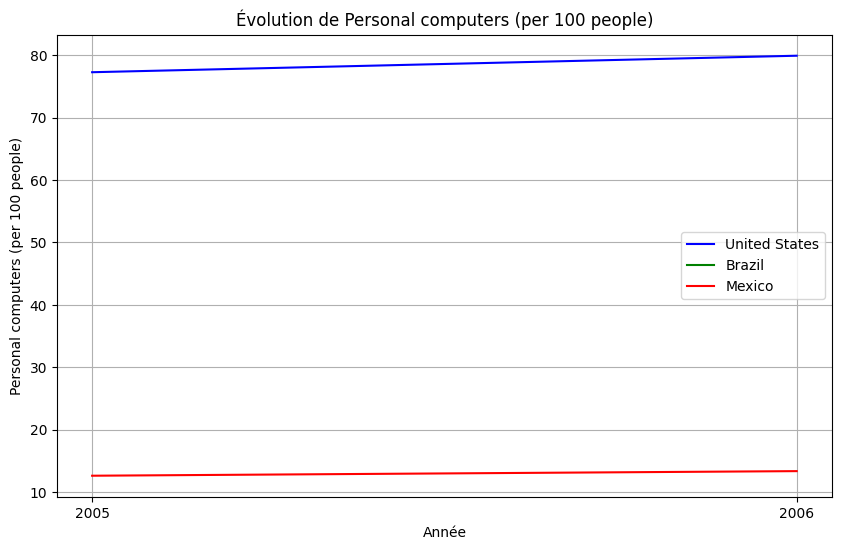

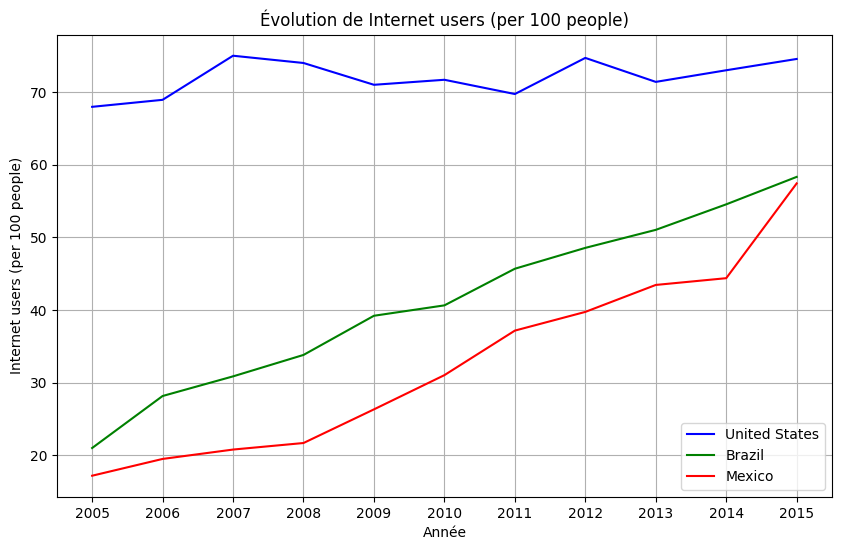

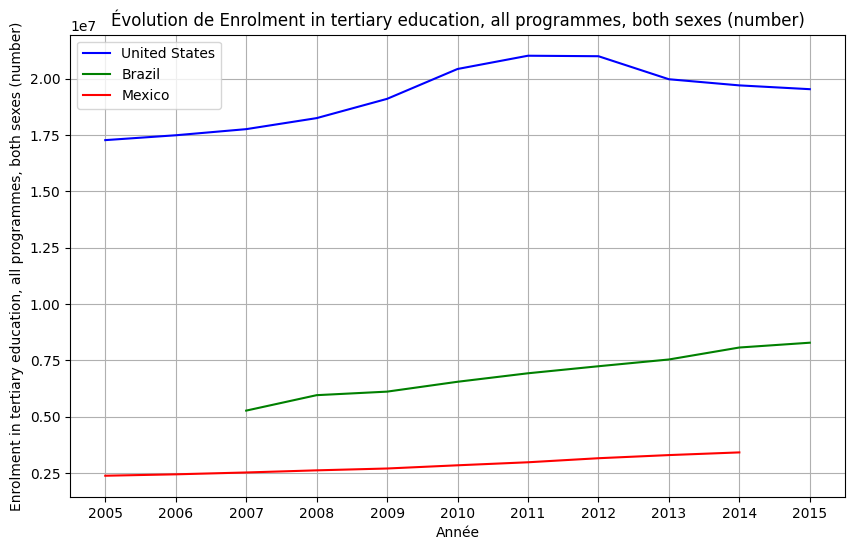

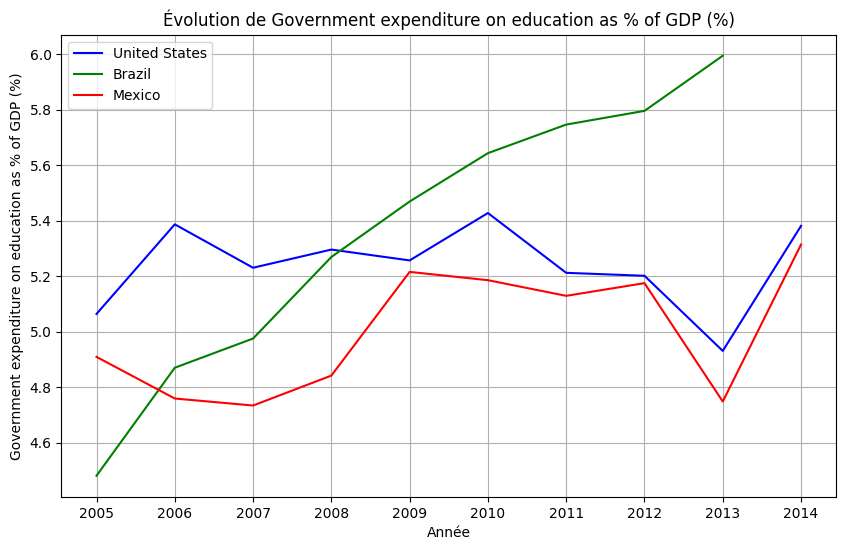

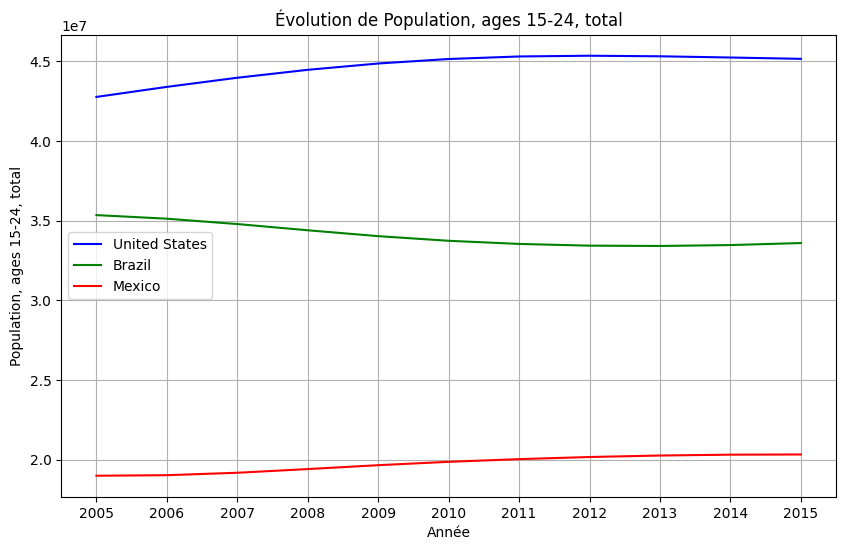

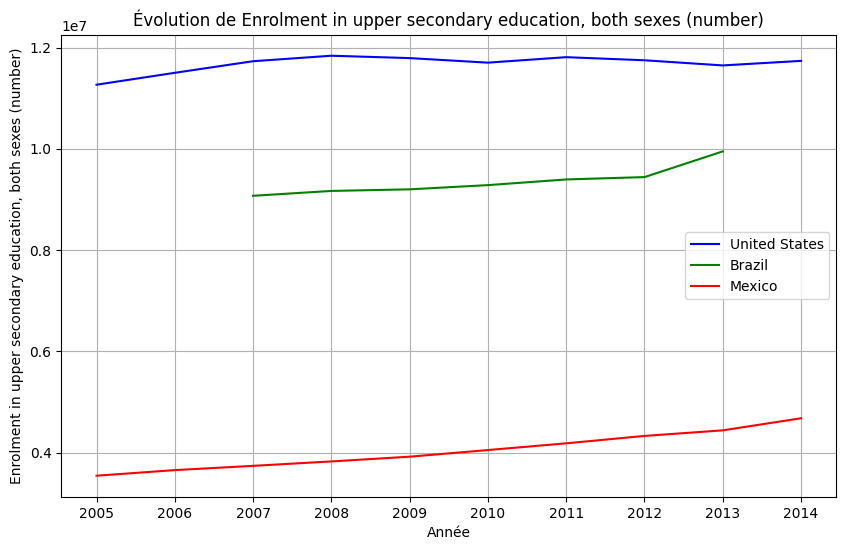

In [35]:
top_3_countries = data_optimize.head(3)['Country Name'].to_list()
colors = ['blue', 'green', 'red']

# Boucle sur chaque indicateur
for indicator in indicators:
    plt.figure(figsize=(10, 6))  # Créer un nouveau graphique pour chaque indicateur

    for country, color in zip(top_3_countries, colors):
        country_data = filtered_data[filtered_data['Country Name'] == country]
        indicator_data = country_data[country_data['Indicator Code'] == indicator]

        if not indicator_data.empty:
            plt.plot(years, indicator_data[years].values[0], label=country, color=color)

    # Configuration du graphique
    plt.xlabel('Année')
    plt.ylabel(indicator_data['Indicator Name'].values[0])
    plt.title(f'Évolution de {indicator_data["Indicator Name"].values[0]}')
    plt.legend()  # Affichage de la légende
    plt.grid(True)
    plt.show()